In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Clustering
from importlib import reload
reload(Clustering)
from Clustering import *
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
from cpclasses import save_plot


Converged after 1 iterations
[1 0 1 1 1 1 2 2 2 1]


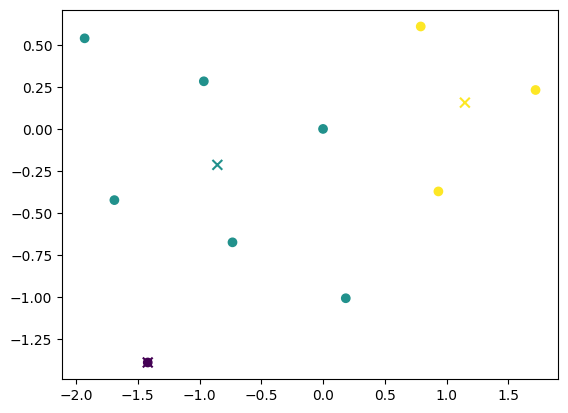

In [2]:
N_clusters = 3


kmeans = KMeans(n_clusters= N_clusters, max_iter=100)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
colors = colors[:N_clusters]

centroids = kmeans.fit(positions[0])


fig, ax = plt.subplots()
print(kmeans.labels)
ax.scatter(centroids[:,0], centroids[:,1], marker = 'x', s =50, c = list(set(kmeans.labels)))
ax.scatter(positions[0][:,0], positions[0][:,1], c = kmeans.labels, cmap = 'viridis')

Converged after 26 iterations


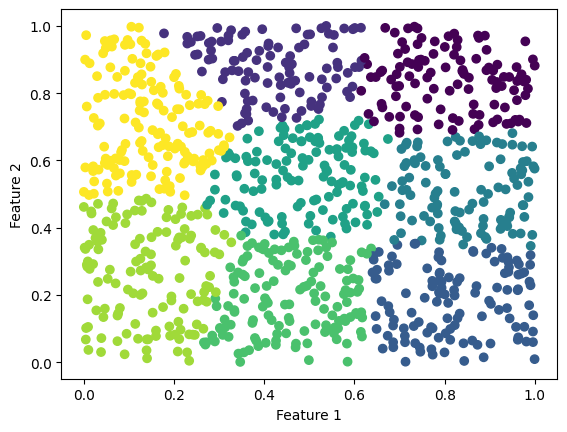

In [3]:
X = np.random.rand(1000,2)

N_clusters = 8


kmeans = KMeans(n_clusters= N_clusters, max_iter=100)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
colors = colors[:N_clusters]

centroids = kmeans.fit(X)


fig, ax = plt.subplots()

#ax.scatter(centroids[:,0], centroids[:,1], marker = 'x', s =50, c = list(set(kmeans.labels)))
ax.scatter(X[:,0], X[:,1], c = kmeans.labels, cmap = 'viridis')
ax.set(xlabel = 'Feature 1', ylabel = 'Feature 2')

save_plot(fig, 'kmeans.png', bbox_inches = 'tight')

In [4]:
#X = positions[0]

centroids_out = kmeans.fit(X)

Converged after 34 iterations


[ 0 21  1  2  3  4  2  5  2  2  2 28  2  2  6  7  7  1 -1 -1 -1 -1  8  2
  2 -1  9  2  2 10 11 14  7 -1 12 13  4 14 -1  2  8  2 21 -1 10 15 16 15
 11  2 15  5  2  9  2  0  0 -1 10 17 18  2 10 -1  2  2  2  7  2  7 19  2
  1 20  2 21  2 22  0 10  2 10 -1  2  2  4  2 -1 31 -1 -1 -1  2 23  2 -1
  7 -1 16  5  2  2 16  8  2 12  7 -1 15 21  7  5 23  7 10  7  2  2 23 21
 10 17 10 18  2 15 31 -1 14  5  2  7  7 20 -1  7  2 22  0 21 15 15  3 15
 26 20 13 11 18  2  7 23  2  0  0  7 -1 -1 11 -1  2 24  4 11  2 25 20 15
 15  1 18 20 23  9  2  7  2  4 14 27  4 11 20  2  1 28  2 20  2 18 20 16
 10 10  7 -1 -1 21  2  2  2  7  4 -1 25  3 20  2  7 10 20 11 -1 25  2  7
  7 13 -1 18 16  2 -1  2  2 18  4 15 11 -1 -1 -1  3 10 14 -1  0 16 26  2
  2 -1  2 20 11 10  8 20  7  4 12 -1  2  2  1 14 12 20  2 21  7 -1  4  4
  0  0 15  2 20  2  2 24  2 -1  7  2  7  2 26  7  2  2 15 16 -1 17 -1 10
  2  7 20  4  3 10  0 -1 12 22  7 14  7 24 12  7 -1  2 21 15  1 10  2 -1
 20 18 19 18 23  8 20  2  2  2  2 -1  7 -1  2  2  2

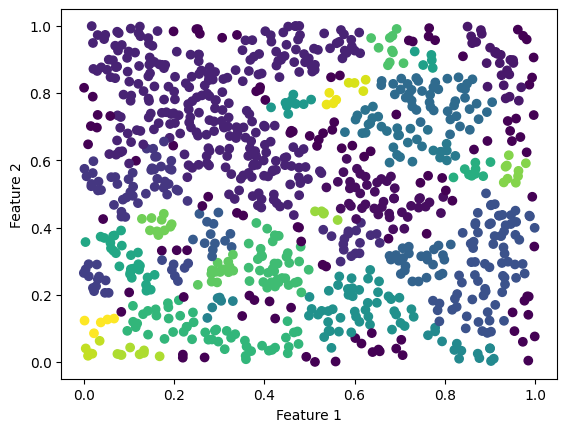

In [5]:
#import dbscan from scipy:
X = np.random.rand(1000,2)
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.039, min_samples = 5).fit(X)
labels = db.labels_

print(labels)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c = labels, cmap = 'viridis')


ax.set(xlabel = 'Feature 1', ylabel = 'Feature 2')

save_plot(fig, 'dbscan.png', bbox_inches = 'tight')

In [6]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Hot(each) for each in np.linspace(0, 1, len(unique_labels))]

fig, ax = plt.subplots()
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        label = "Outlier"
    else:
        label = None

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        label=label,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

ax.legend()

save_plot(fig, 'dbscan_clusters.png', bbox_inches = 'tight')


AttributeError: module 'matplotlib.cm' has no attribute 'Hot'

In [92]:
x = True

print(x)

print(~x)

True
-2


C:\Users\tobia\AppData\Local\Temp\ipykernel_17652\1000218962.py:5: DeprecationWarning: Bitwise inversion '~' on bool is deprecated. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  print(~x)
